In [1]:
from sklearn.datasets import make_classification

In [2]:
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,
weights=[0.9],random_state=12,n_redundant=0)
#weight means one class is 90% more compare to other class that makes imbalnce

In [3]:
x

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]])

In [4]:
print(type(x))
x.columns

<class 'numpy.ndarray'>


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [28]:
import pandas as pd
#df1=pd.DataFrame(x,columns=["f1","f2"])
df1=pd.DataFrame(x,columns=x.columns)
df2=pd.DataFrame(y,columns=["target"])
final_df=pd.concat([df1,df2],axis=1)

In [29]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [5]:
final_df.shape

(1000, 3)

In [6]:
final_df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

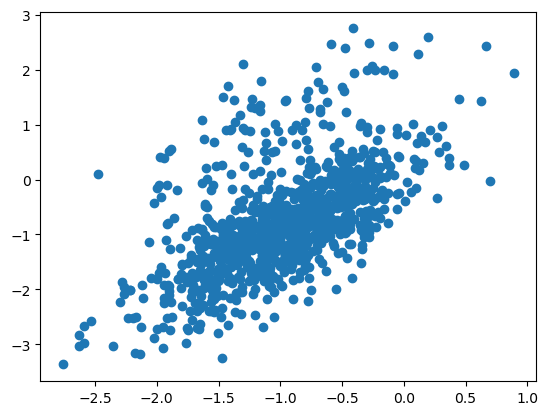

In [7]:
import matplotlib.pyplot as plt
plt.scatter(final_df["f1"],final_df["f2"])
plt.show()

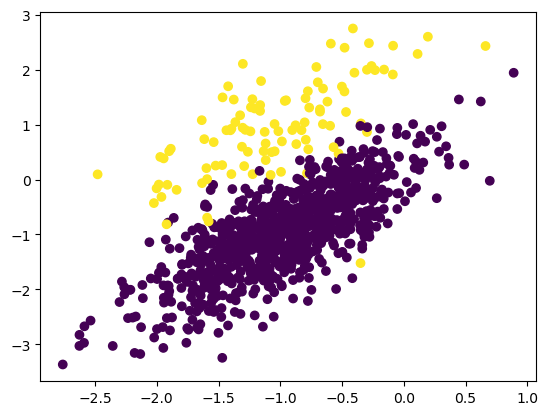

In [8]:
import matplotlib.pyplot as plt
plt.scatter(final_df["f1"],final_df["f2"],c=final_df["target"])

In [9]:
#Now applying SMOTE to make it balanced
#we will be using imlearn,by default it it not present we are going to install it 
# that is imblearn
!pip install imblearn


In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[["f1","f2"]],final_df["target"])

In [30]:
x

,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206
...,...,...
1795,-0.876370,0.899702
1796,-0.488559,0.671132
1797,-1.393345,0.897145
1798,-0.310336,0.903214


In [12]:
x.shape

(1800, 2)

In [13]:
y.shape

(1800,)

In [14]:
#checking weather they are equallyy resampled or not
len(y[y==0])

900

In [15]:
len(y[y==1])

900

In [16]:
#Creating dataframes 
df1=pd.DataFrame(x,columns=["f1","f2"])
df2=pd.DataFrame(y,columns=["target"])
oversample_df=pd.concat([df1,df2],axis=1)

In [31]:
oversample_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


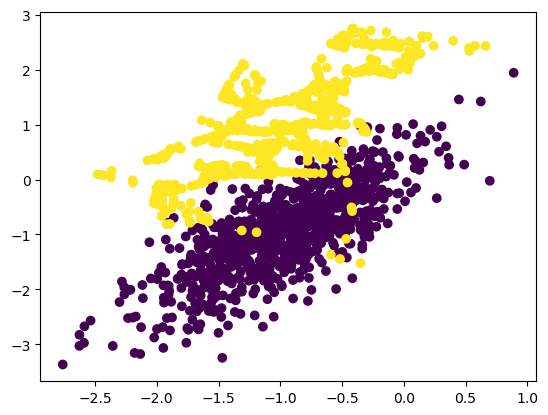

In [17]:
plt.scatter(oversample_df["f1"],oversample_df["f2"],c=oversample_df["target"])

In [18]:
#Now we can see the dot are connected in between (Synthetic points)
#Now it is better to apply the machine larning algorithm and solve a classifiaction problem